In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('bankloans.csv')
data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [17]:
data=data.dropna()
data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


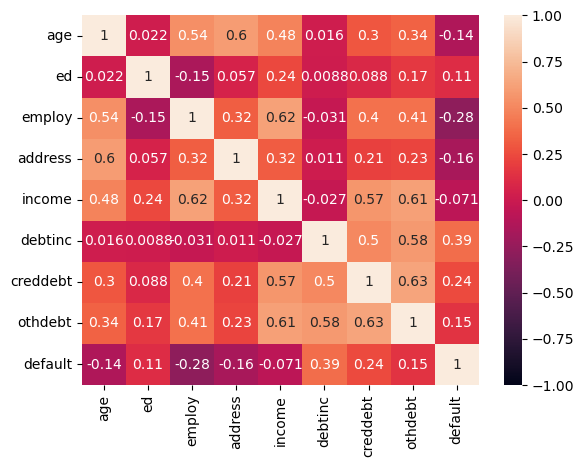

In [20]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'ed'}>,
        <Axes: title={'center': 'employ'}>],
       [<Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'debtinc'}>],
       [<Axes: title={'center': 'creddebt'}>,
        <Axes: title={'center': 'othdebt'}>,
        <Axes: title={'center': 'default'}>]], dtype=object)

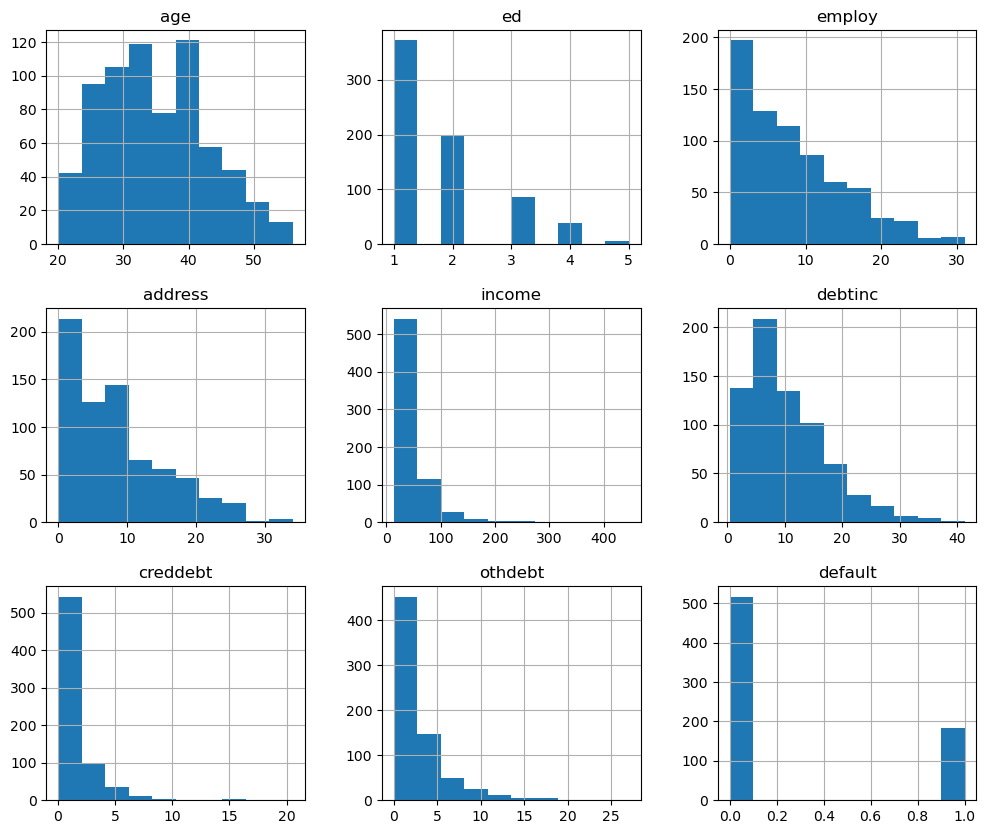

In [21]:
data.hist(figsize=(12,10))

<Axes: >

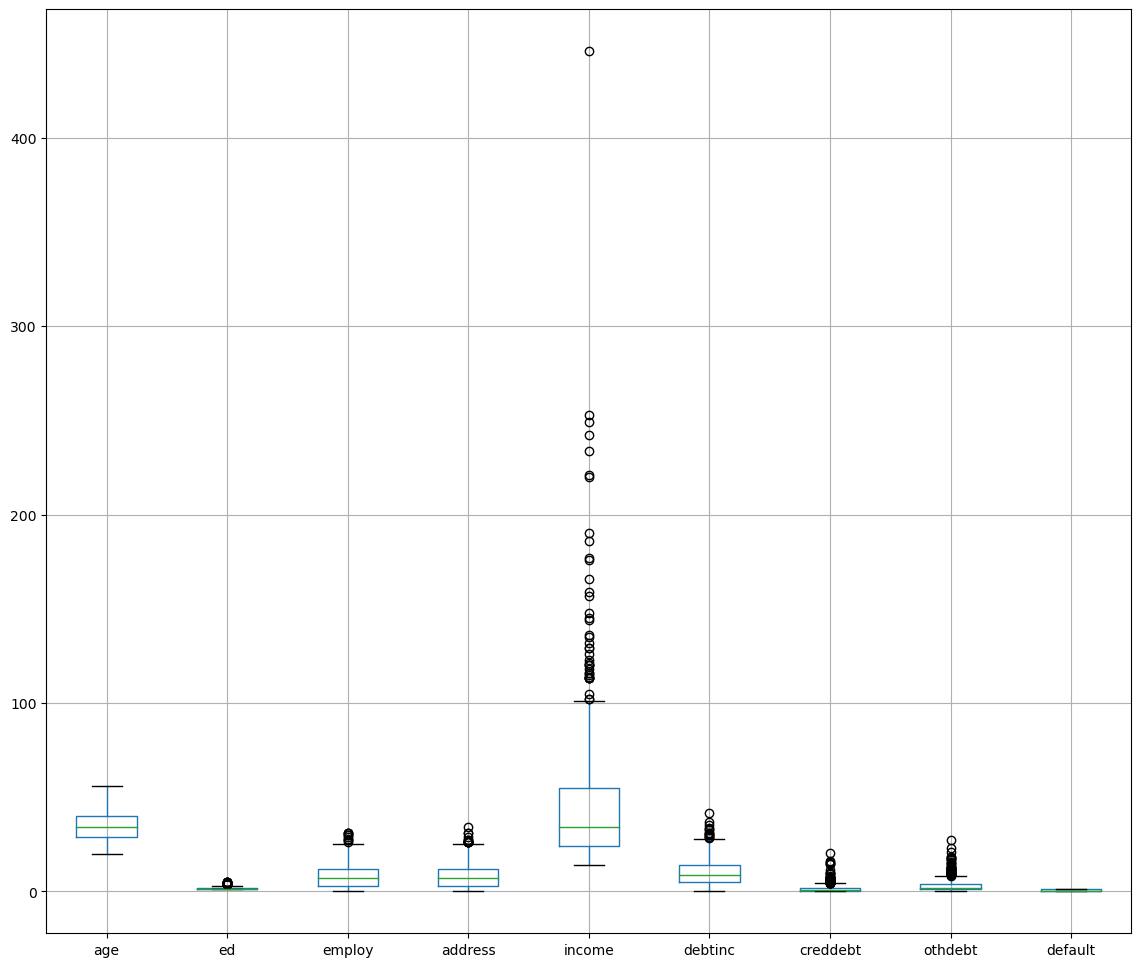

In [22]:
data.boxplot(figsize=(14,12))

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


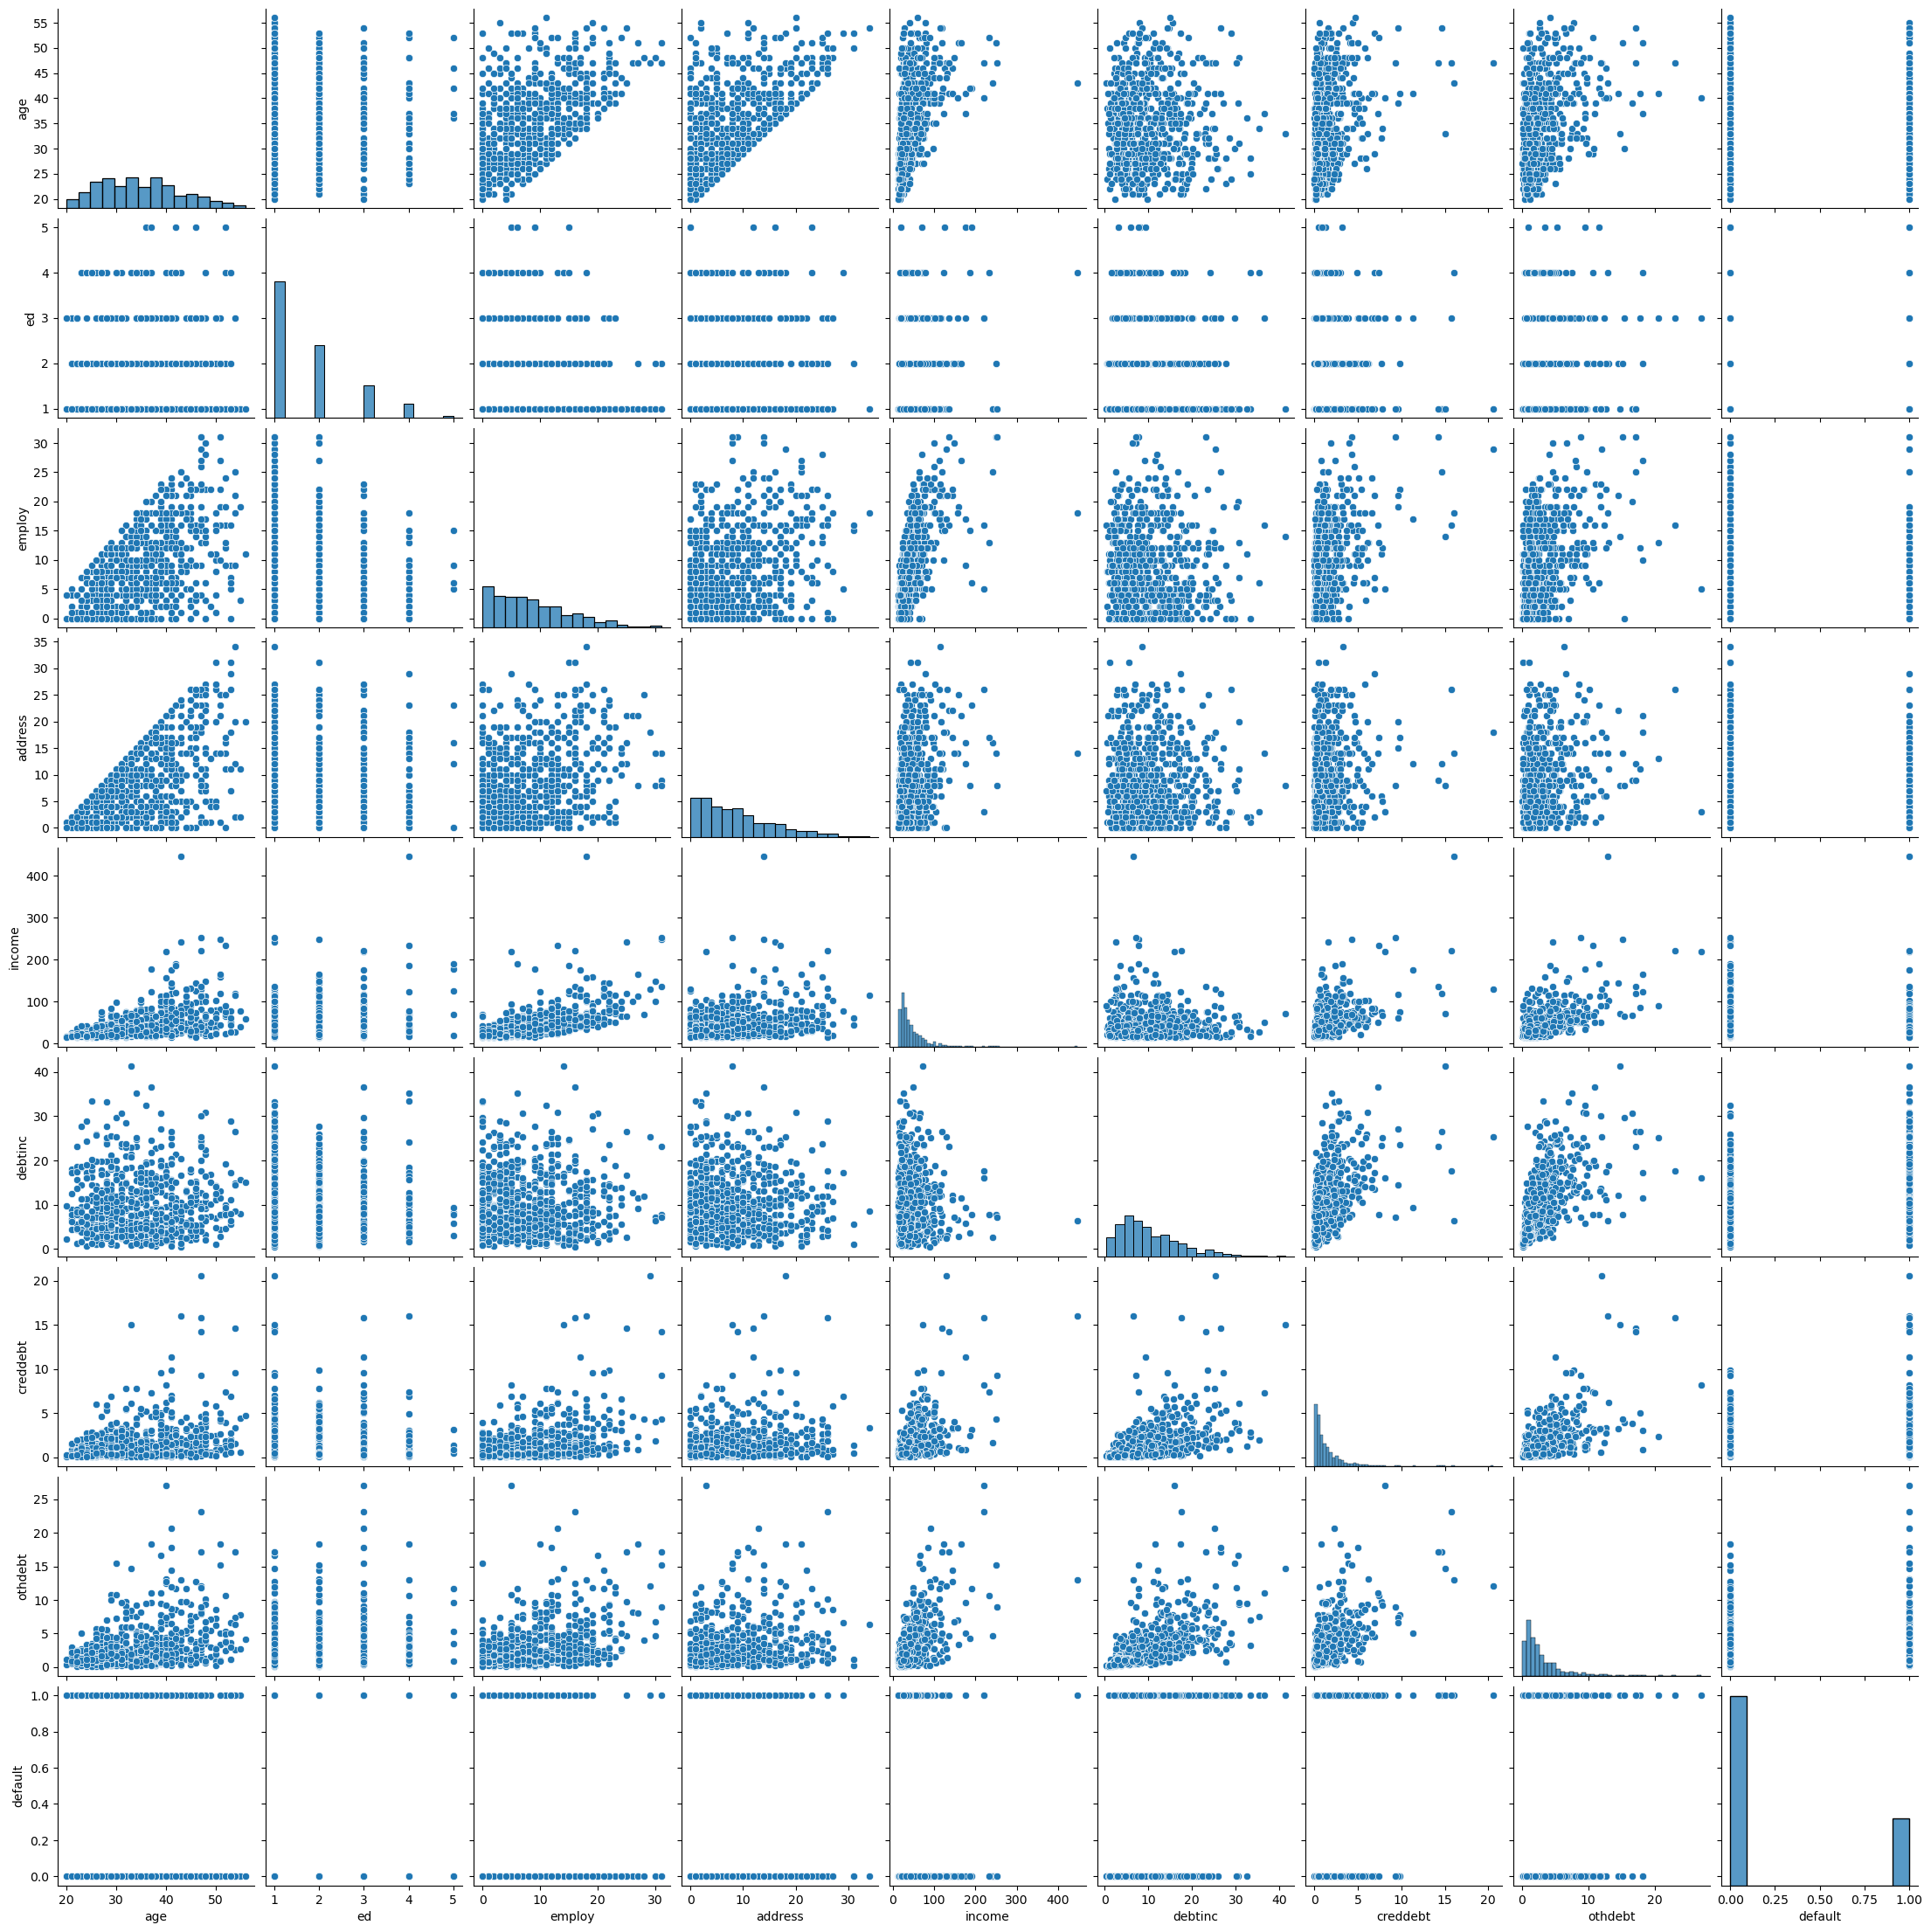

In [23]:
sns.pairplot(data)

In [24]:
x=data.iloc[:,:-1]
x

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938
696,29,2,6,4,21,11.5,0.369495,2.045505
697,33,1,15,3,32,7.6,0.491264,1.940736
698,45,1,19,22,77,8.4,2.302608,4.165392


In [25]:
y=data.iloc[:,-1:]
y

,default
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
695,1.0
696,0.0
697,0.0
698,0.0


In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (525, 8)

Training data-y- Shape:	 (525, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (175, 8)

Testing data(y-Outcome) Shape:	 (175, 1)


In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)
print('**************************Training non-linear SVM model*********************************\n')
non_linear_svm_model = SVC(kernel='rbf')
print('Training started....\n')
non_linear_svm_model.fit(xtrain, ytrain)
print('Training completed....\n')
print('Testing invoked....\n')
y_pred_non_linear = non_linear_svm_model.predict(xtest)
print('Predicted total is....\n', np.unique(y_pred_non_linear))
print('\nTesting is also completed.....\n')

**************************Training non-linear SVM model*********************************

Training started....

Training completed....

Testing invoked....

Predicted total is....
 [0. 1.]

Testing is also completed.....



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("***************Non-Linear SVM Model's Performance****************\n")
print('Mean Squared Error:\t',mean_squared_error(ytest,y_pred_non_linear))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,y_pred_non_linear)))
print()
print('R-Square value:\t',r2_score(ytest,y_pred_non_linear))

***************Non-Linear SVM Model's Performance****************

Mean Squared Error:	 0.2714285714285714

RMSE:	 0.5209880722517277

R-Square value:	 -0.3505965981213506


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 20)
print('*********Training linear SVM model************\n')
linear_svm_model=LinearSVC()
print('Training started....\n')
linear_svm_model.fit(xtrain, ytrain)
print('Training completed....\n')

print('Testing invoked....\n')
y_pred_linear = linear_svm_model.predict(xtest)
print('Predicted total is....\n', y_pred_linear)
print('\nTesting is also completed.....\n')

*********Training linear SVM model************

Training started....

Training completed....

Testing invoked....

Predicted total is....
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Testing is also completed.....



C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(ytest, y_pred_linear)
precision = precision_score(ytest, y_pred_linear, average='weighted')  
recall = recall_score(ytest, y_pred_linear, average='weighted')  
f1 = f1_score(ytest, y_pred_linear, average='weighted') 

print("******SVM Model's Performance*****")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

******SVM Model's Performance*****

Accuracy: 0.3357142857142857
Precision: 0.7833850931677019
Recall: 0.3357142857142857
F1 Score: 0.18606195224413916


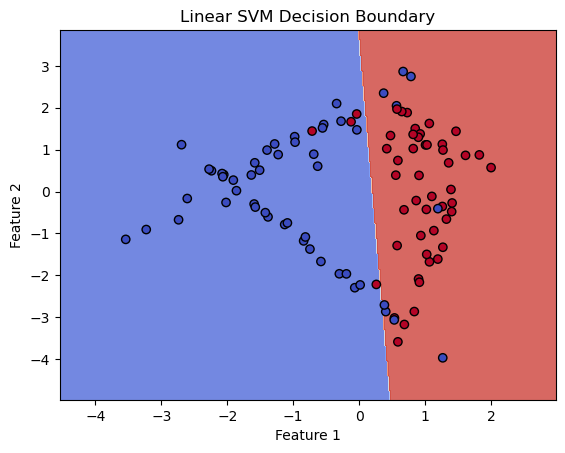

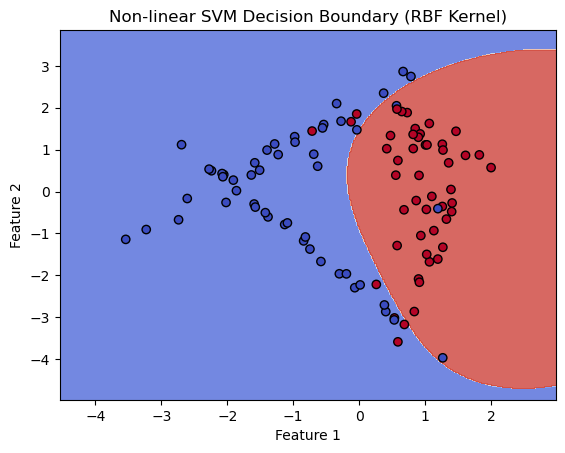

In [35]:
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=20)

linear_svm_model = LinearSVC(C=1)
linear_svm_model.fit(X, y)

non_linear_svm_model = SVC(C=1, kernel='rbf', gamma=0.1)
non_linear_svm_model.fit(X, y)

def plot_decision_boundary(model, X, y, title):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(linear_svm_model, X, y, 'Linear SVM Decision Boundary')
plot_decision_boundary(non_linear_svm_model, X, y, 'Non-linear SVM Decision Boundary (RBF Kernel)')

In [36]:
print('****Hyperparameters for linear SVM models******\n')
print(linear_svm_model.get_params())
print()
print('****Hyperparameters for non-linear SVM models******\n')
print(non_linear_svm_model.get_params())

****Hyperparameters for linear SVM models******

{'C': 1, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}

****Hyperparameters for non-linear SVM models******

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


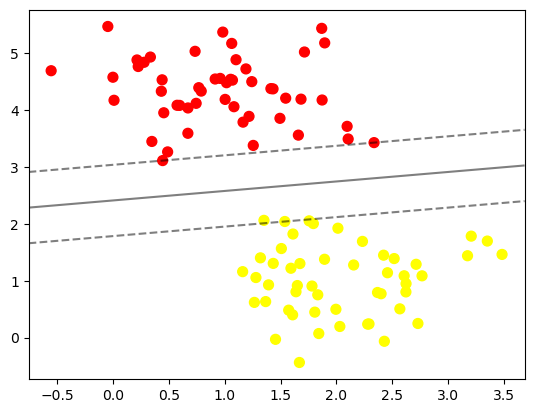

In [38]:
from sklearn import datasets
from sklearn.svm import SVC

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
linear_accuracy = accuracy_score(ytest, y_pred_linear)
linear_precision = precision_score(ytest, y_pred_linear, average='weighted')
linear_recall = recall_score(ytest, y_pred_linear, average='weighted')
linear_f1 = f1_score(ytest, y_pred_linear, average='weighted')
linear_conf_matrix = confusion_matrix(ytest, y_pred_linear)

non_linear_accuracy = accuracy_score(ytest, y_pred_non_linear)
non_linear_precision = precision_score(ytest, y_pred_non_linear, average='weighted')
non_linear_recall = recall_score(ytest, y_pred_non_linear, average='weighted')
non_linear_f1 = f1_score(ytest, y_pred_non_linear, average='weighted')
non_linear_conf_matrix = confusion_matrix(ytest, y_pred_non_linear)


print("*******Linear SVM Performance Metrics********\n")
print(f"Accuracy: {linear_accuracy:.4f}")
print(f"Precision: {linear_precision:.4f}")
print(f"Recall: {linear_recall:.4f}")
print(f"F1 Score: {linear_f1:.4f}")
print("Confusion Matrix:")
print(linear_conf_matrix)

print("\n*******Non-linear SVM Performance Metrics*******\n")
print(f"Accuracy: {non_linear_accuracy:.4f}")
print(f"Precision: {non_linear_precision:.4f}")
print(f"Recall: {non_linear_recall:.4f}")
print(f"F1 Score: {non_linear_f1:.4f}")
print("Confusion Matrix:")
print(non_linear_conf_matrix)

*******Linear SVM Performance Metrics********

Accuracy: 0.3357
Precision: 0.7834
Recall: 0.3357
F1 Score: 0.1861
Confusion Matrix:
[[ 2 93]
 [ 0 45]]

*******Non-linear SVM Performance Metrics*******

Accuracy: 0.6857
Precision: 0.6799
Recall: 0.6857
F1 Score: 0.5767
Confusion Matrix:
[[94  1]
 [43  2]]


In [41]:
from sklearn.svm import SVR
support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
support_reg.fit(xtrain,ytrain)
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted price:
 [ 2.36631419e-01  3.57785463e-01  1.96679840e-01  1.61781416e-01
  7.50828468e-02 -1.18197668e-02  4.29093095e-02  1.41585426e-02
  1.30435730e-01  7.07800065e-02 -1.68322336e-01  5.06012146e-02
  1.75683302e-02  1.04345974e-01  3.47794855e-01  3.45387027e-01
  3.23870911e-02  2.38597175e-01  1.56754077e-02  2.16071102e-01
  4.03595673e-02  3.80926310e-02  1.69275592e-01  9.47452249e-02
  1.70943934e-01  7.17801624e-02  1.87675365e-01  1.70196701e-01
  1.49740292e-01  2.71940196e-01  2.34852691e-01  7.13680341e-02
  1.78508738e-01  1.11071450e-02  4.21703064e-02 -1.49414087e-03
  9.65800226e-02  1.21146547e-01  9.03213928e-02 -7.52717060e-02
  2.14388882e-01  6.08926562e-02  2.36162656e-01  2.52748873e-01
 -5.99246149e-03 -1.05663368e-01 -1.04868893e-01  2.37057836e-01
  3.98855250e-02  5.33611122e-01  3.29578197e-01  8.21427723e-01
  1.86116076e-01  1.11690303e-01 -5.88107220e-02  1.48617989e-01
  2.76208643e-01  8.89780046e-02  1.47246627e-02  1.09660425e+00
  1.262

In [43]:
support_reg=SVR(kernel='sigmoid')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
support_reg.fit(xtrain,ytrain)
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [ 7.80108108 -0.10146686  0.46353615 -6.59026302  3.19870596 14.73012949
  6.39379017  4.54602331 -0.05233309 25.93275237 23.60659477  0.47795744
 -3.32647049 -2.06956844  6.90532806 -2.74646916 -1.1527084   4.45811067
 36.73815278  4.36610613 -2.06614326 -3.56886468 -2.12537224 -1.41584356
  0.97020337  0.60856221  7.81713235  1.78284468  3.26923275 -2.94942868
 12.51369889 -4.85593454  3.9462651   0.39588729  3.00090024 -3.02356668
 -3.37032193  6.11248733 -2.02132852  0.79067601  0.5903983   2.5511233
 20.79518696  2.70616942 -1.44854917 20.76935125  0.45209016 -3.84844663
 -2.28276918  2.37241561 11.60285352 33.44127322  9.17692921  1.58248801
 -1.09335043 -3.66682954 -1.7953535  -1.06669035 -2.61252937 34.25729662
 -0.1106936  -4.79186384  1.67081085 -2.85863147 -2.57497

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
